In [62]:
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
import time
import random
import json

In [74]:
link_to_main_page = 'https://kaz.nur.kz/latest/'

In [75]:
r = requests.get(link_to_main_page)
soup = BeautifulSoup(r.text, 'html.parser')
blocks = soup.select('div.burger__menu--section.js-analytics-section')

In [76]:
target_block = None
for block in blocks:
    p_tag = block.find('p', class_='burger__menu--section-title')
    if p_tag and 'Барлық санат' in p_tag.get_text(strip=True):
        target_block = block
        break

## get categories links

In [157]:
links_set = set()

In [158]:
links = target_block.find_all('a', class_='burger__menu--section--item-subitem-link', href=True)

In [159]:
links[0]

<a class="burger__menu--section--item-subitem-link" href="https://kaz.nur.kz/leisure/books/">
                      Кітап                    </a>

In [160]:
links_for_reg_cat = target_block.find_all('a', class_='burger__menu--section--item--link burger__menu--section--item--link-full', href=True)

In [161]:
links_for_reg_cat[0]

<a class="burger__menu--section--item--link burger__menu--section--item--link-full" href="https://kaz.nur.kz/latest/">
              БАРЛЫҚ ЖАҢАЛЫҚ                          </a>

In [162]:
links_for_reg_cat.pop(0)

<a class="burger__menu--section--item--link burger__menu--section--item--link-full" href="https://kaz.nur.kz/latest/">
              БАРЛЫҚ ЖАҢАЛЫҚ                          </a>

In [163]:
links_for_reg_cat

[<a class="burger__menu--section--item--link burger__menu--section--item--link-full" href="https://kaz.nur.kz/kak-rabotaet-nur-kz-kaz/">
               Біз қалай жұмыс істейміз                          </a>,
 <a class="burger__menu--section--item--link burger__menu--section--item--link-full" href="https://kaz.nur.kz/kaleidoscope/">
               Калейдоскоп                          </a>,
 <a class="burger__menu--section--item--link burger__menu--section--item--link-full" href="https://kaz.nur.kz/lady/">
               Ханшайым                          </a>,
 <a class="burger__menu--section--item--link burger__menu--section--item--link-full" href="https://kaz.nur.kz/society/">
               Қоғам                          </a>,
 <a class="burger__menu--section--item--link burger__menu--section--item--link-full" href="https://kaz.nur.kz/world/">
               Әлемде                          </a>]

In [164]:
for link in links_for_reg_cat:
    links_set.add(link['href'])

In [165]:
for link in links:
    links_set.add(link['href'])

In [166]:
links_list = list(links_set)

In [167]:
with open("links_nurkz.json", "w", encoding="utf-8") as f:
    json.dump(links_list, f, ensure_ascii=False, indent=2)

## get tags

In [168]:
tags_set = set()

In [169]:
tags = target_block.find_all('a', class_='burger__menu--section--item-subitem-link')

In [ ]:
tags[0]

<a class="burger__menu--section--item-subitem-link" href="https://kaz.nur.kz/leisure/books/">
                      Кітап                    </a>

In [171]:
for tag in tags:
    tags_set.add(tag.get_text(strip=True).lower())

In [172]:
tags_for_reg_cat = target_block.find_all('a', class_='burger__menu--section--item--link burger__menu--section--item--link-full')

In [173]:
tags_for_reg_cat[0]

<a class="burger__menu--section--item--link burger__menu--section--item--link-full" href="https://kaz.nur.kz/latest/">
              БАРЛЫҚ ЖАҢАЛЫҚ                          </a>

In [174]:
tags_for_reg_cat.pop(0)

<a class="burger__menu--section--item--link burger__menu--section--item--link-full" href="https://kaz.nur.kz/latest/">
              БАРЛЫҚ ЖАҢАЛЫҚ                          </a>

In [175]:
tags_for_reg_cat

[<a class="burger__menu--section--item--link burger__menu--section--item--link-full" href="https://kaz.nur.kz/kak-rabotaet-nur-kz-kaz/">
               Біз қалай жұмыс істейміз                          </a>,
 <a class="burger__menu--section--item--link burger__menu--section--item--link-full" href="https://kaz.nur.kz/kaleidoscope/">
               Калейдоскоп                          </a>,
 <a class="burger__menu--section--item--link burger__menu--section--item--link-full" href="https://kaz.nur.kz/lady/">
               Ханшайым                          </a>,
 <a class="burger__menu--section--item--link burger__menu--section--item--link-full" href="https://kaz.nur.kz/society/">
               Қоғам                          </a>,
 <a class="burger__menu--section--item--link burger__menu--section--item--link-full" href="https://kaz.nur.kz/world/">
               Әлемде                          </a>]

In [176]:
for tag in tags_for_reg_cat:
    tags_set.add(tag.get_text(strip=True).lower())

In [177]:
tags_list = list(tags_set)

In [178]:
with open("tags_nurkz.json", "w", encoding="utf-8") as f:
    json.dump(tags_list, f, ensure_ascii=False, indent=2)

## parsing

In [100]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

In [198]:
def get_dynamic_content(url, scroll_pause_time=2):

    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

    try:
        driver.get(url)
        
        scroll_height = driver.execute_script("return document.body.scrollHeight")

        all_links = []
        num_links = 0
        cnt = 0


        while True and cnt < 21:

            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(scroll_pause_time)
            new_scroll_height = driver.execute_script("return document.body.scrollHeight")

            if new_scroll_height == scroll_height:
                break

            scroll_height = new_scroll_height

            cnt += 1

        elements = driver.find_elements(By.CSS_SELECTOR, 'a.article-card__title.js-article-link') 

        for element in elements:
            num_links += 1
            all_links.append(element.get_attribute('href'))
            if num_links == 400:
                break

    finally:
        driver.quit()

    return all_links



In [199]:
def get_text_tags(url, retries=3, delay=5):

    headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
            "Accept-Language": "en-US,en;q=0.9",
            }

    try:

        r = requests.get(url, timeout=(3,5), headers=headers)

        r.raise_for_status()

    except requests.exceptions.Timeout:

        print(f"Timeout при загрузке: {url}")
        
        if retries > 0:
            print(f"Повтор через {delay} сек... Осталось попыток: {retries}")
            time.sleep(delay)
            return get_text_tags(url, retries - 1, delay)
        else:
            return "", []
    
    except requests.exceptions.RequestException as e:

        print(f"Error downloading {url}: {e}")
        return "", []
    
    soup = BeautifulSoup(r.text, 'html.parser')
    
    paragraphs = soup.select('p.formatted-body__paragraph')

    article_text = ''''''

    for p in paragraphs:

        for el in p.find_all(['a', 'img', 'em', 'strong', 'span']):
            el.replace_with(f''' {el.get_text(strip=True)}''')

        text = p.get_text()

        if text:
            article_text += f''' {text}'''

    tags_element = soup.select_one('a.breadcrumbs-item.breadcrumbs-item--secondary')

    if tags_element:
        tag_of_article = tags_element.get_text(strip=True).lower()
    else:
        tag_of_article = None

    return article_text, tag_of_article


In [200]:
nurkz_df = pd.DataFrame()

for link in links_list:

  for_file_name = link.replace('https://kaz.nur.kz/', '').replace('/', '_', 1).replace('/','')

  print(for_file_name)

  article_of_each_tag = {
    'text': [],
    'tags': [],
    'url': []
  }

  all_links = get_dynamic_content(link)
  time.sleep(1)

  for link in all_links:
    text, tag = get_text_tags(link)
    time.sleep(1)
    article_of_each_tag['text'].append(text)
    article_of_each_tag['tags'].append(tag)
    article_of_each_tag['url'].append(link)

  tag_df = pd.DataFrame(article_of_each_tag)
  tag_df.to_csv(os.path.join('nurkz_articles', f"""{for_file_name}.csv"""), index = False)
  nurkz_df = pd.concat([nurkz_df, tag_df], ignore_index=True)

  print(f'{for_file_name} ✅')


health_healthy-lifestyle
health_healthy-lifestyle ✅
leisure_holidays
leisure_holidays ✅
sport_other-sports
sport_other-sports ✅
sport_mma
sport_mma ✅
accidents_road-accident
accidents_road-accident ✅
lady_
lady_ ✅
sport_olympiad
sport_olympiad ✅
kaleidoscope_
kaleidoscope_ ✅
showbiz_incidents
showbiz_incidents ✅
kak-rabotaet-nur-kz-kaz_
kak-rabotaet-nur-kz-kaz_ ✅
esoterics_interesting
esoterics_interesting ✅
sport_fight
sport_fight ✅
family_beauty
family_beauty ✅
accidents_crime
accidents_crime ✅
nurfin_stock
nurfin_stock ✅
accidents_emergency
Timeout при загрузке: https://kaz.nur.kz/accidents/emergency/2206014-azerbaijan-airlines-kompaniiasynyng-reseige-bet-algan-ushagy-bakuge-oraluga-mazhbur-boldy/
Повтор через 5 сек... Осталось попыток: 3
accidents_emergency ✅
nurfin_insurance
nurfin_insurance ✅
leisure_books
leisure_books ✅
sport_boxing
sport_boxing ✅
food_recipes
food_recipes ✅
politics_kazakhstan
politics_kazakhstan ✅
society_
Error downloading https://kaz.nur.kz/society/2230961-

In [203]:
nurkz_df.head(10)

,text,tags,url
0,Бие сүтін адам өмірін ұзартатын сусын ретінд...,салауатты өмір салты,https://kaz.nur.kz/health/healthy-lifestyle/22...
1,Қыстың аязды күндерінде көлікті дұрыс қыздыр...,салауатты өмір салты,https://kaz.nur.kz/health/healthy-lifestyle/22...
2,АҚШ-тың Азық-түлік және дәрі-дәрмек сапасын ...,салауатты өмір салты,https://kaz.nur.kz/health/healthy-lifestyle/21...
3,Е дәрумені терінің саулығы мен мидың қызметі...,салауатты өмір салты,https://kaz.nur.kz/health/healthy-lifestyle/21...
4,Сынаптан жасалған дене қызуын өлшейтін құрал...,салауатты өмір салты,https://kaz.nur.kz/health/healthy-lifestyle/21...
5,"""Маңғыстау облыстық тұтынушылардың құқықтары...",салауатты өмір салты,https://kaz.nur.kz/health/healthy-lifestyle/21...
6,Көптеген мәдениетте алғашқы неке түнінде жай...,салауатты өмір салты,https://kaz.nur.kz/health/healthy-lifestyle/21...
7,Кегель жаттығуларының жамбас бұлшықеттеріне ...,салауатты өмір салты,https://kaz.nur.kz/health/healthy-lifestyle/21...
8,Мия тамыры асқазан проблемалары мен жөтелге ...,салауатты өмір салты,https://kaz.nur.kz/health/healthy-lifestyle/21...
9,Денсаулықтың мықты болуының негізі - дұрыс т...,салауатты өмір салты,https://kaz.nur.kz/health/healthy-lifestyle/21...


In [202]:
nurkz_df.to_csv(os.path.join('dataset', 'nurkz_df.csv'), index = False)

In [204]:
nurkz_df.shape

(15624, 3)

In [207]:
import matplotlib.pyplot as plt

In [208]:
tags_series = nurkz_df['tags']

In [209]:
cnt_tags = tags_series.value_counts(ascending=False)

In [211]:
cnt_tags = cnt_tags[:-2]

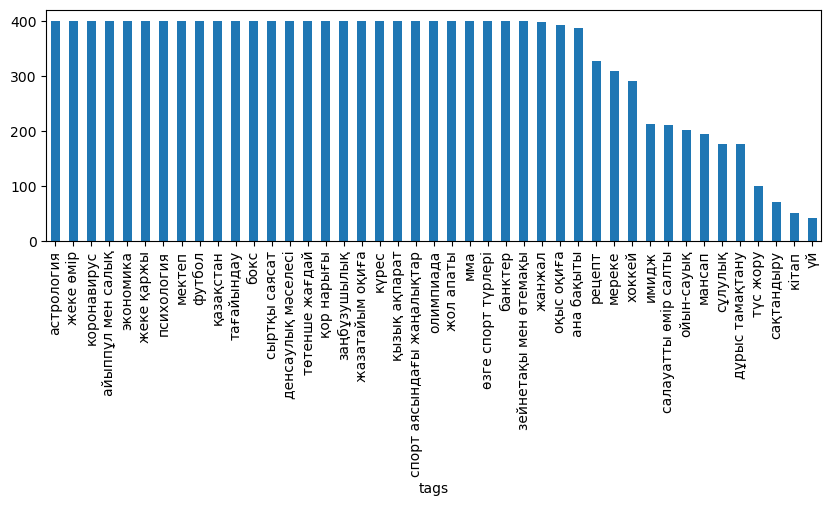

In [223]:
plt.figure(figsize=(10,3))
cnt_tags.plot(kind='bar')
plt.show()